In [6]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.7 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [8]:

import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import scipy.optimize as optimize
 

Defining the fundamental parameters

In [9]:
NUM_TRADING_DAYS = 252

NUM_PORTFOLIOS = 100000

stocks = ['INFY.NS', 'RELIANCE.NS', 'HDFCBANK.NS', 'TCS.NS', 'HINDUNILVR.NS', 'LT.NS', 'ITC.NS']

start_date = '2015-01-01'
end_date = '2022-09-30'

Downloading and storing data

In [10]:
stock_data = {}

for stock in stocks:
    ticker = yf.Ticker(stock)
    stock_data[stock] = ticker.history(start = start_date, end = end_date)['Close']
    
stock_prices = pd.DataFrame(stock_data)
stock_prices

,INFY.NS,RELIANCE.NS,HDFCBANK.NS,TCS.NS,HINDUNILVR.NS,LT.NS,ITC.NS
Date,,,,,,,
2015-01-01 00:00:00+05:30,403.362793,417.988922,451.475281,1097.644165,663.048523,872.794983,195.391052
2015-01-02 00:00:00+05:30,411.289459,416.882660,457.758606,1112.261475,660.863037,891.203979,196.003052
2015-01-05 00:00:00+05:30,407.755157,412.316223,453.893829,1095.358398,664.665771,903.602417,196.774719
2015-01-06 00:00:00+05:30,399.236053,393.603455,446.828003,1054.976807,677.254395,873.462952,191.718979
2015-01-07 00:00:00+05:30,401.146149,402.171326,448.132050,1042.514893,701.033264,871.372253,188.153351
...,...,...,...,...,...,...,...
2022-09-23 00:00:00+05:30,1350.688843,2439.500000,1446.150024,2974.352295,2664.174805,1856.849976,346.399994
2022-09-26 00:00:00+05:30,1365.328857,2377.350098,1426.650024,2986.670166,2642.817871,1851.449951,332.600006
2022-09-27 00:00:00+05:30,1378.485107,2396.250000,1413.849976,3009.660889,2661.393311,1841.199951,334.850006


Showing price charts for the stocks

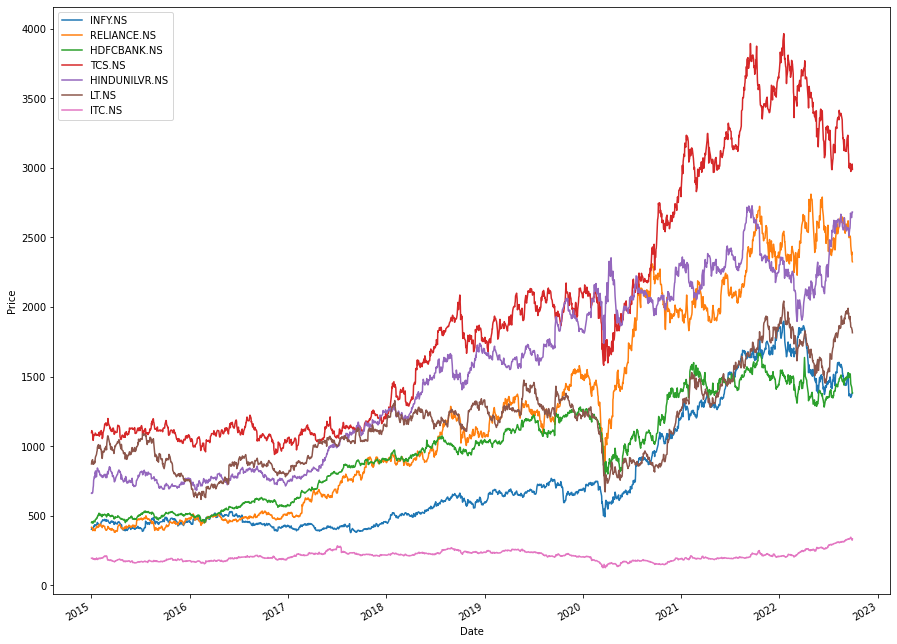

In [11]:
stock_prices.plot(figsize = (15, 12))
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

Calculating logarithmic daily returns

In [12]:
log_returns = np.log(stock_prices / stock_prices.shift(1))[1:]
log_returns

,INFY.NS,RELIANCE.NS,HDFCBANK.NS,TCS.NS,HINDUNILVR.NS,LT.NS,ITC.NS
Date,,,,,,,
2015-01-02 00:00:00+05:30,0.019461,-0.002650,0.013821,0.013229,-0.003302,0.020873,0.003127
2015-01-05 00:00:00+05:30,-0.008630,-0.011014,-0.008479,-0.015314,0.005738,0.013816,0.003929
2015-01-06 00:00:00+05:30,-0.021114,-0.046447,-0.015690,-0.037563,0.018763,-0.033924,-0.026029
2015-01-07 00:00:00+05:30,0.004773,0.021534,0.002914,-0.011883,0.034508,-0.002396,-0.018773
2015-01-08 00:00:00+05:30,0.005029,-0.014443,0.020788,0.010737,0.018716,0.006344,0.024724
...,...,...,...,...,...,...,...
2022-09-23 00:00:00+05:30,-0.001829,-0.018922,-0.027183,-0.008465,-0.003981,-0.016742,0.003905
2022-09-26 00:00:00+05:30,0.010781,-0.025807,-0.013576,0.004133,-0.008049,-0.002912,-0.040654
2022-09-27 00:00:00+05:30,0.009590,0.007919,-0.009013,0.007668,0.007004,-0.005552,0.006742


Statistics of the stocks

In [13]:
print('*** NET RETURNS ON THE STOCKS ***')
print(log_returns.mean() * NUM_TRADING_DAYS)
print()
print('*** VOLATILITY OF THE STOCKS ***')
print(np.sqrt(log_returns.var() * NUM_TRADING_DAYS))

*** NET RETURNS ON THE STOCKS ***
INFY.NS          0.162450
RELIANCE.NS      0.226187
HDFCBANK.NS      0.147486
TCS.NS           0.132058
HINDUNILVR.NS    0.184212
LT.NS            0.096532
ITC.NS           0.070287
dtype: float64

*** VOLATILITY OF THE STOCKS ***
INFY.NS          0.274695
RELIANCE.NS      0.295545
HDFCBANK.NS      0.234880
TCS.NS           0.245770
HINDUNILVR.NS    0.234869
LT.NS            0.279226
ITC.NS           0.269837
dtype: float64


Simulating portfolios

In [14]:
portfolio_means = []
portfolio_risks = []
portfolio_weights = []

for _ in range(NUM_PORTFOLIOS):
    w = np.random.random(len(stocks))
    w /= np.sum(w)
    portfolio_weights.append(w)
    portfolio_means.append(np.sum(log_returns.mean() * w) * NUM_TRADING_DAYS)
    portfolio_risks.append(np.sqrt(np.dot(w.T, np.dot(log_returns.cov() * NUM_TRADING_DAYS, w))))

weights = np.array(portfolio_weights)
returns = np.array(portfolio_means)
risks = np.array(portfolio_risks)

portfolios = pd.DataFrame({'Return': returns, 'Risk': risks, 'Sharpe Ratio': returns/risks})
portfolios

,Return,Risk,Sharpe Ratio
0,0.157701,0.169383,0.931037
1,0.155498,0.168268,0.924113
2,0.137810,0.172540,0.798710
3,0.139640,0.171982,0.811945
4,0.139183,0.172251,0.808024
...,...,...,...
99995,0.137452,0.168184,0.817269
99996,0.137330,0.169533,0.810048
99997,0.132637,0.169264,0.783610
99998,0.145994,0.169668,0.860470


Plotting the portfolios

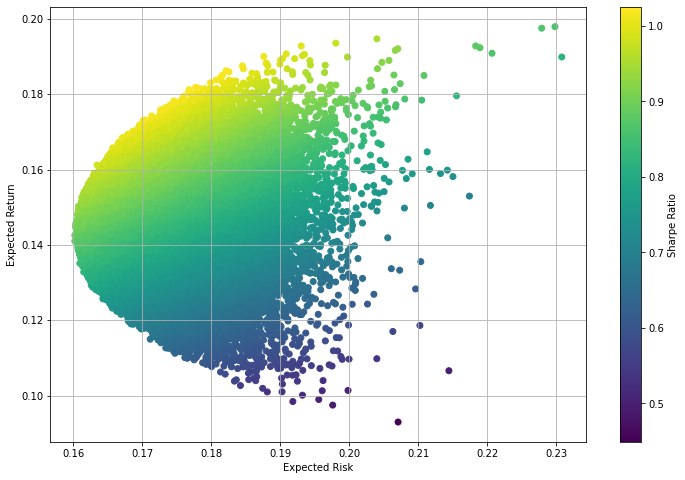

In [15]:
plt.figure(figsize = (12, 8))
plt.scatter(risks, returns, c = returns / risks, marker = 'o')
plt.grid(True)
plt.xlabel('Expected Risk')
plt.ylabel('Expected Return')
plt.colorbar(label = 'Sharpe Ratio')
plt.show()

Finding optimal portfolio (maximum Sharpe Ratio)

In [16]:
sharpe_ratios = returns / risks
index = 0

for i in range(len(sharpe_ratios)):
    if sharpe_ratios[i] == np.amax(sharpe_ratios):
        index = i
        
print("The optimal portfolio has a Sharpe Ratio: ", sharpe_ratios[index].round(5))
print()

print("Expected Return: ", returns[index].round(5))
print("Expected Volatility: ", risks[index].round(5))
print()

print("Weights to be allotted to the stocks:")

for i in range(len(stocks)):
    print(stocks[i],':', weights[index][i].round(5))

The optimal portfolio has a Sharpe Ratio:  1.02497

Expected Return:  0.18122
Expected Volatility:  0.1768

Weights to be allotted to the stocks:
INFY.NS : 0.18747
RELIANCE.NS : 0.28181
HDFCBANK.NS : 0.15252
TCS.NS : 0.05986
HINDUNILVR.NS : 0.29783
LT.NS : 0.01208
ITC.NS : 0.00844


Plotting Optimal Portfolio

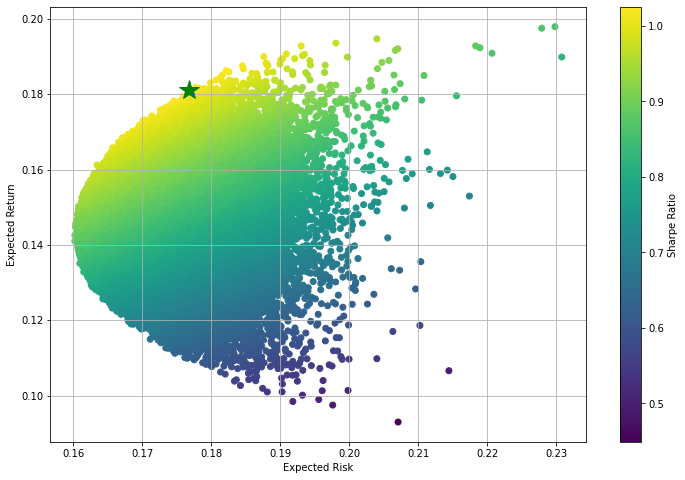

In [17]:
plt.figure(figsize = (12, 8))
plt.scatter(risks, returns, c = returns / risks, marker = 'o')
plt.grid(True)
plt.xlabel("Expected Risk")
plt.ylabel("Expected Return")
plt.colorbar(label = "Sharpe Ratio")
plt.plot(risks[index], returns[index], 'g*', markersize = 20.0)

Minimum Variance Portfolio

In [18]:
index1 = 0

for i in range(len(risks)):
    if risks[i] == np.amin(risks):
        index1 = i
        
print("The minimum variance portfolio has a Sharpe Ratio: ", sharpe_ratios[index1].round(5))
print()

print("Expected Return: ", returns[index1].round(5))
print("Expected Volatility: ", risks[index1].round(5))
print()

print("Weights to be allotted to the stocks:")

for i in range(len(stocks)):
    print(stocks[i],':', weights[index1][i].round(5))

The minimum variance portfolio has a Sharpe Ratio:  0.88958

Expected Return:  0.14253
Expected Volatility:  0.16022

Weights to be allotted to the stocks:
INFY.NS : 0.09679
RELIANCE.NS : 0.0541
HDFCBANK.NS : 0.2014
TCS.NS : 0.20033
HINDUNILVR.NS : 0.22607
LT.NS : 0.04617
ITC.NS : 0.17513


Plotting Minimum Variance Portfolio

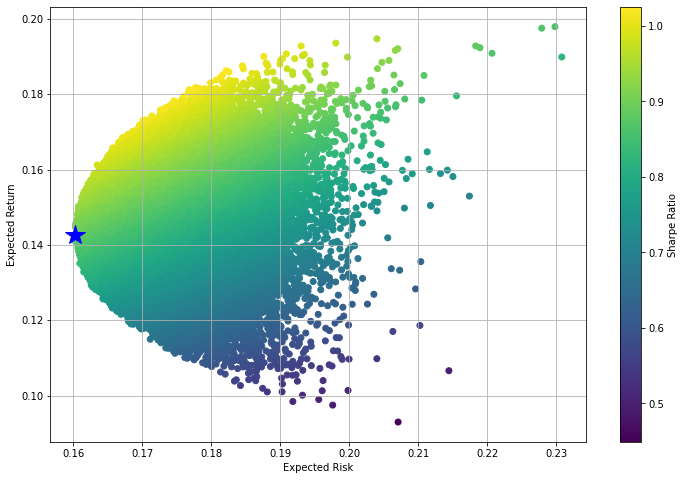

In [19]:
plt.figure(figsize = (12, 8))
plt.scatter(risks, returns, c = returns / risks, marker = 'o')
plt.grid(True)
plt.xlabel("Expected Risk")
plt.ylabel("Expected Return")
plt.colorbar(label = "Sharpe Ratio")
plt.plot(risks[index1], returns[index1], 'b*', markersize = 20.0)